In [1]:
import numpy as np

In [2]:
def adagrad(gradient_func, beta_init, learning_ratio = 0.1, epsilon=1e-8,max_iter=100):

SyntaxError: incomplete input (732052519.py, line 1)

In [7]:
import numpy as np

def adagrad(gradient_func, beta_init, learning_rate, max_iter, epsilon=1e-8):
    """
    Implements the Adagrad optimization algorithm.

    Args:
        gradient_func (function): Function to compute the gradient of the objective.
        beta_init (np.array): Initial parameter values.
        learning_rate (float): Learning rate for the algorithm.
        max_iter (int): Maximum number of iterations.
        epsilon (float): Small value to prevent division by zero (default: 1e-8).

    Returns:
        tuple: Optimized parameters and history of parameter updates.
    """
    beta = beta_init
    g_accum = np.zeros_like(beta)  # Accumulated squared gradients
    history = [beta.copy()]  # Track parameter values at each iteration

    for t in range(max_iter):
        # Compute the gradient of the objective function
        gradient = gradient_func(beta)

        # Accumulate squared gradients
        g_accum += gradient ** 2

        # Update parameters with adaptive learning rate
        beta -= (learning_rate / (np.sqrt(g_accum) + epsilon)) * gradient
        alpha = (learning_rate / (np.sqrt(g_accum) + epsilon))
        print(alpha)
        # Store beta for history
        history.append(beta.copy())
    return beta, history

# Example Usage
# Define a simple quadratic objective function: R(beta) = (beta - 3)^2
def objective_gradient(beta):
    return 2 * (beta - 3)  # Gradient of the function

# Initial parameter
beta_init = np.array([0.0])  # Starting value

# Run Adagrad
optimized_beta, beta_history = adagrad(
    gradient_func=objective_gradient,
    beta_init=beta_init,
    learning_rate=0.1,
    max_iter=100
)

# Print the results
print("Optimized Beta:", optimized_beta)


[0.01666667]
[0.01198314]
[0.00991671]
[0.00868826]
[0.00785183]
[0.00723567]
[0.00675772]
[0.00637317]
[0.00605523]
[0.00578675]
[0.00555619]
[0.00535544]
[0.00517865]
[0.00502144]
[0.00488049]
[0.00475319]
[0.00463751]
[0.00453181]
[0.00443475]
[0.00434522]
[0.00426233]
[0.0041853]
[0.00411349]
[0.00404634]
[0.00398338]
[0.00392421]
[0.00386846]
[0.00381583]
[0.00376605]
[0.00371887]
[0.00367408]
[0.00363149]
[0.00359094]
[0.00355226]
[0.00351534]
[0.00348003]
[0.00344624]
[0.00341385]
[0.00338279]
[0.00335296]
[0.00332429]
[0.0032967]
[0.00327015]
[0.00324456]
[0.00321988]
[0.00319606]
[0.00317305]
[0.00315082]
[0.00312932]
[0.00310851]
[0.00308836]
[0.00306884]
[0.00304992]
[0.00303157]
[0.00301376]
[0.00299647]
[0.00297968]
[0.00296336]
[0.00294749]
[0.00293206]
[0.00291704]
[0.00290243]
[0.00288819]
[0.00287433]
[0.00286081]
[0.00284764]
[0.00283479]
[0.00282226]
[0.00281003]
[0.0027981]
[0.00278644]
[0.00277506]
[0.00276394]
[0.00275307]
[0.00274244]
[0.00273206]
[0.0027219]
[0.

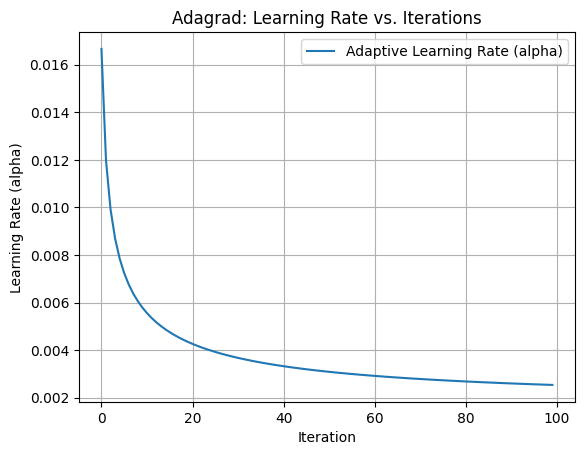

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def adagrad(gradient_func, beta_init, learning_rate, max_iter, epsilon=1e-8):
    """
    Implements the Adagrad optimization algorithm and tracks alpha values.

    Args:
        gradient_func (function): Function to compute the gradient of the objective.
        beta_init (np.array): Initial parameter values.
        learning_rate (float): Learning rate for the algorithm.
        max_iter (int): Maximum number of iterations.
        epsilon (float): Small value to prevent division by zero (default: 1e-8).

    Returns:
        tuple: Optimized parameters, history of parameter updates, and alpha values.
    """
    beta = beta_init
    g_accum = np.zeros_like(beta)  # Accumulated squared gradients
    history = [beta.copy()]  # Track parameter values at each iteration
    alpha_values = []  # Track learning rates (alpha)

    for t in range(max_iter):
        # Compute the gradient of the objective function
        gradient = gradient_func(beta)

        # Accumulate squared gradients
        g_accum += gradient ** 2

        # Compute adaptive learning rate (alpha)
        alpha = learning_rate / (np.sqrt(g_accum) + epsilon)
        alpha_values.append(alpha.copy())  # Store alpha values

        # Update parameters
        beta -= alpha * gradient

        # Store beta for history
        history.append(beta.copy())

    return beta, history, alpha_values

# Example usage
def objective_gradient(beta):
    return 2 * (beta - 3)  # Gradient of the function

beta_init = np.array([0.0])  # Starting value

# Run Adagrad
optimized_beta, beta_history, alpha_history = adagrad(
    gradient_func=objective_gradient,
    beta_init=beta_init,
    learning_rate=0.1,
    max_iter=100
)

# Plot alpha values against the number of iterations
plt.plot(range(len(alpha_history)), alpha_history, label="Adaptive Learning Rate (alpha)")
plt.xlabel("Iteration")
plt.ylabel("Learning Rate (alpha)")
plt.title("Adagrad: Learning Rate vs. Iterations")
plt.legend()
plt.grid()
plt.show()
